# Exploratory Data Analysis: US Census Income Dataset

This notebook explores the US Census income dataset to understand patterns in demographic and employment variables that predict whether an individual earns above or below $50,000 annually.

**Contents**

- Data Loading and Overview  
- Missing Values and Placeholder Analysis  
- Target Variable Distribution  
- Age Distribution Analysis  
- Weighted Income Analysis by Demographics  
- Weighted Income Analysis by Employment  
- Feature Engineering  
- Information Value Analysis (WOE & IV)  
- Logistic Regression Model (Weighted Demographic Classifier)  
- Population Segmentation with PCA and KMeans  
  - Segmentation Feature Set and Scaling  
  - PCA Exploration and Component Interpretation  
  - KMeans Cluster Selection (Elbow and Silhouette)  
  - Final Clusters in PCA Space  
  - Cluster Profiles (Numeric, Education, Worker Type, Marital Status)  
  - Income Distribution and Insights by Cluster
- Conlusion


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Data Loading and Overview

In [4]:
columns = [
    'age', 'class of worker', 'detailed industry recode', 'detailed occupation recode',
    'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat',
    'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex',
    'member of a labor union', 'reason for unemployment', 'full or part time employment stat',
    'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat',
    'region of previous residence', 'state of previous residence', 'detailed household and family stat',
    'detailed household summary in household', 'weight', 'migration code-change in msa',
    'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago',
    'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18',
    'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship',
    'own business or self employed', 'fill inc questionnaire for veteran\'s admin', 'veterans benefits',
    'weeks worked in year', 'year', 'label'
]

df = pd.read_csv('/kaggle/input/us-census-income/census-bureau.csv', header=None, names=columns, delimiter=',')
print(f'Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns')

Dataset shape: 199,523 rows, 42 columns


In [5]:
df.head(4)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [6]:
df.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


## Missing Values and Placeholder Analysis

In [7]:
# checking for actual null values
null_summary = df.isna().agg(['sum', 'mean']).T
null_summary[null_summary['sum'] > 0]

,sum,mean
hispanic origin,874.0,0.00438


Only hispanic origin has 874 actual null values (0.4% of data).

In [8]:
# checking for "?" placeholder values
question_marks = df.eq('?').sum()
question_marks[question_marks > 0]

state of previous residence         708
migration code-change in msa      99696
migration code-change in reg      99696
migration code-move within reg    99696
migration prev res in sunbelt     99696
country of birth father            6713
country of birth mother            6119
country of birth self              3393
dtype: int64

In [9]:
# checking for "Not in universe" placeholder values
not_in_universe = df.eq('Not in universe').sum()
not_in_universe[not_in_universe > 0].head(10)

class of worker                   100245
enroll in edu inst last wk        186943
major occupation code             100684
member of a labor union           180459
reason for unemployment           193453
region of previous residence      183750
state of previous residence       183750
migration code-change in msa        1516
migration code-change in reg        1516
migration code-move within reg      1516
dtype: int64

About 50% of the data in migration columns have "?" while 90%+ in some columns like "region of previous residence" is "Not in universe". These represent meaningful patterns (children, non-workers, non-movers) rather than missing data, so we convert them to a uniform "Not_applicable" category.

In [10]:
# standardizing placeholder values
df = df.replace({
    'Not in universe': 'Not_applicable',
    'Not in universe under 1 year old': 'Not_applicable',
    'Not in universe or children': 'Not_applicable',
    'Not in universe under 1': 'Not_applicable',
    'Not in universe or armed forces': 'Not_applicable',
    '?': 'Not_applicable'
})

## Target Variable Distribution

In [11]:
# creating target variables
df['outcome_cat'] = df['label'].apply(lambda x: 'high-income' if x.strip() == '50000+.' else 'low-income')
df['outcome_bin'] = df['outcome_cat'].map({'low-income': 0, 'high-income': 1})

# income distribution summary
income_summary = df['outcome_cat'].value_counts().to_frame('count')
income_summary['percent'] = (income_summary['count'] / len(df) * 100).round(2)
income_summary.loc['Total'] = [len(df), 100.00]
income_summary

,count,percent
outcome_cat,,
low-income,187141.0,93.79
high-income,12382.0,6.21
Total,199523.0,100.00


The dataset shows significant class imbalance with only 6.21% earning above $50,000. This 15:1 ratio will need to be addressed during modeling.

In [12]:
# income distribution by survey year
df.groupby('year')['outcome_cat'].value_counts().unstack(fill_value=0)

outcome_cat,high-income,low-income
year,,
94,5839,93988
95,6543,93153


In [13]:
# weight distribution by year and income
df.groupby(['year', 'outcome_cat'])['weight'].agg(['count', 'min', 'max', 'mean', 'median'])

count     min       max         mean   median
year outcome_cat                                               
94   high-income   5839  111.47   7968.30  1792.278763  1703.78
     low-income   93988   81.29  18656.30  1724.746451  1622.28
95   high-income   6543   49.82   8432.83  1799.805831  1654.56
     low-income   93153   37.87  16349.20  1748.727124  1603.48

## Age Distribution Analysis

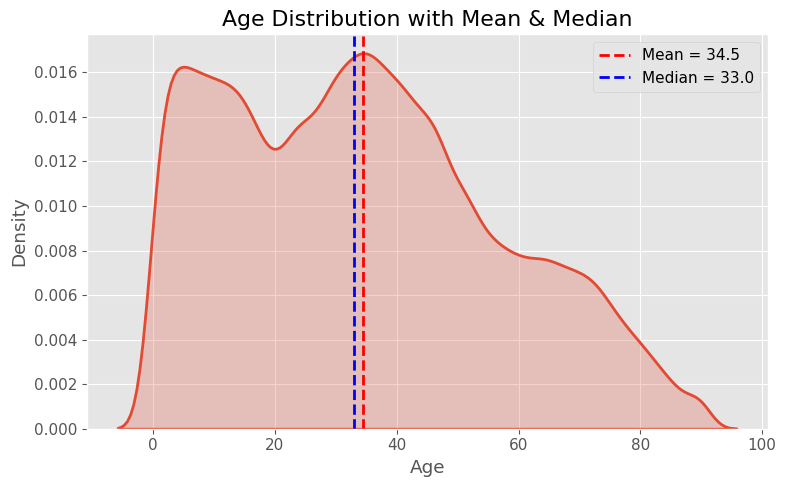

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(df['age'], fill=True, linewidth=2, ax=ax)

mean_age = df['age'].mean()
median_age = df['age'].median()

ax.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_age:.1f}')
ax.axvline(median_age, color='blue', linestyle='--', linewidth=2, label=f'Median = {median_age:.1f}')

ax.set_title('Age Distribution with Mean & Median')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()
plt.tight_layout()
plt.show()

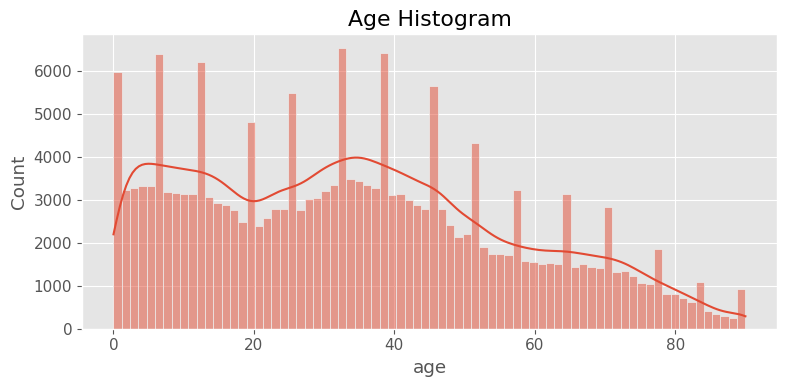

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(df['age'], kde=True, ax=ax)
ax.set_title('Age Histogram')
plt.tight_layout()
plt.show()

In [16]:
# creating age bins for analysis
df['age_bin'] = pd.cut(df['age'], bins=[0, 12, 27, 39, 55, 90], 
                       labels=['0–12', '12–27', '27–39', '39–55', '55–90'], 
                       include_lowest=True)

df['age_bin'].value_counts().sort_index()

age_bin
0–12     41202
12–27    40869
27–39    39136
39–55    39847
55–90    38469
Name: count, dtype: int64

The age distribution shows a large child population (0-12) which explains many "Not in universe" values in employment columns.

## Weighted Income Analysis by Demographics

Using survey weights to calculate population-representative high-income rates.

In [17]:
def weighted_high_income_rate(group):
    """Calculate weighted high-income rate for a group."""
    return np.average(group['outcome_bin'], weights=group['weight'])

def get_weighted_rates(df, col):
    """Get weighted high-income rates by category, sorted descending."""
    rates = df.groupby(col, observed=False).apply(
        weighted_high_income_rate, include_groups=False
    ).sort_values(ascending=False) * 100
    return rates

# overall weighted high-income rate
overall_rate = np.average(df['outcome_bin'], weights=df['weight']) * 100
print(f'Overall weighted high-income rate: {overall_rate:.2f}%')

Overall weighted high-income rate: 6.41%


In [18]:
# high-income rate by sex
print('High-income rate by sex:')
get_weighted_rates(df, 'sex').round(2)

High-income rate by sex:


sex
Male      10.32
Female     2.67
dtype: float64

Males have nearly 4x higher income rate (10.3%) compared to females (2.7%).

In [19]:
# high-income rate by race
print('High-income rate by race:')
get_weighted_rates(df, 'race').round(2)

High-income rate by race:


race
Asian or Pacific Islander      7.60
White                          7.04
Amer Indian Aleut or Eskimo    3.55
Other                          2.70
Black                          2.49
dtype: float64

In [20]:
# high-income rate by hispanic origin
print('High-income rate by hispanic origin:')
get_weighted_rates(df, 'hispanic origin').round(2)

High-income rate by hispanic origin:


hispanic origin
All other                    6.93
Cuban                        5.08
Other Spanish                3.19
Do not know                  3.12
Chicano                      2.52
Puerto Rican                 2.04
Mexican-American             2.01
Central or South American    1.81
Mexican (Mexicano)           0.99
dtype: float64

In [21]:
# high-income rate by marital status
print('High-income rate by marital status:')
get_weighted_rates(df, 'marital stat').round(2)

High-income rate by marital status:


marital stat
Married-civilian spouse present    11.93
Divorced                            8.07
Married-spouse absent               5.60
Separated                           5.04
Widowed                             3.20
Married-A F spouse present          2.50
Never married                       1.37
dtype: float64

Married individuals with spouse present have the highest income rate (11.9%), nearly 9x higher than never married (1.4%).

In [22]:
# high-income rate by citizenship
print('High-income rate by citizenship:')
get_weighted_rates(df, 'citizenship').round(2)

High-income rate by citizenship:


citizenship
Foreign born- U S citizen by naturalization    10.46
Native- Born abroad of American Parent(s)       7.64
Native- Born in the United States               6.47
Foreign born- Not a citizen of U S              3.89
Native- Born in Puerto Rico or U S Outlying     2.01
dtype: float64

In [23]:
# high-income rate by age group
print('High-income rate by age group:')
get_weighted_rates(df, 'age_bin').round(2)

High-income rate by age group:


age_bin
39–55    15.77
27–39     9.13
55–90     6.57
12–27     0.82
0–12      0.00
dtype: float64

The 39-55 age group has the highest income rate (15.8%), representing peak earning years. Children (0-12) have 0% as expected.

## Weighted Income Analysis by Employment

In [24]:
# high-income rate by education
print('High-income rate by education:')
get_weighted_rates(df, 'education').round(2)

High-income rate by education:


education
Prof school degree (MD DDS DVM LLB JD)    53.89
Doctorate degree(PhD EdD)                 52.63
Masters degree(MA MS MEng MEd MSW MBA)    31.59
Bachelors degree(BA AB BS)                20.35
Associates degree-academic program         9.63
Associates degree-occup /vocational        7.59
Some college but no degree                 6.50
High school graduate                       3.76
12th grade no diploma                      1.48
11th grade                                 1.03
7th and 8th grade                          0.88
10th grade                                 0.83
5th or 6th grade                           0.65
1st 2nd 3rd or 4th grade                   0.64
9th grade                                  0.60
Less than 1st grade                        0.08
Children                                   0.00
dtype: float64

Professional and doctorate degrees have 50%+ high-income rates, while those without diplomas are under 1.5%.

In [25]:
# high-income rate by class of worker
print('High-income rate by class of worker:')
get_weighted_rates(df, 'class of worker').round(2)

High-income rate by class of worker:


class of worker
Self-employed-incorporated        36.26
Federal government                21.08
Self-employed-not incorporated    13.29
State government                  11.72
Local government                  11.22
Private                           10.22
Not_applicable                     0.94
Never worked                       0.29
Without pay                        0.18
dtype: float64

Self-employed incorporated individuals have the highest rate (36.3%), followed by federal government workers (21.1%).

In [26]:
# high-income rate by major industry
print('High-income rate by major industry (top 10):')
get_weighted_rates(df, 'major industry code').head(10).round(2)

High-income rate by major industry (top 10):


major industry code
Mining                               30.27
Other professional services          23.59
Communications                       22.91
Utilities and sanitary services      21.18
Armed Forces                         19.98
Finance insurance and real estate    18.40
Public administration                18.22
Manufacturing-durable goods          16.80
Wholesale trade                      15.55
Forestry and fisheries               14.73
dtype: float64

In [27]:
# high-income rate by major occupation
print('High-income rate by major occupation:')
get_weighted_rates(df, 'major occupation code').round(2)

High-income rate by major occupation:


major occupation code
Executive admin and managerial           29.06
Professional specialty                   25.41
Armed Forces                             19.98
Protective services                      15.68
Sales                                    13.27
Technicians and related support          11.99
Precision production craft & repair       8.89
Transportation and material moving        6.39
Farming forestry and fishing              4.35
Machine operators assmblrs & inspctrs     3.83
Adm support including clerical            3.03
Handlers equip cleaners etc               1.79
Other service                             1.01
Not_applicable                            0.94
Private household services                0.33
dtype: float64

Executive and professional occupations lead with 25-29% high-income rates.

In [28]:
# average weeks worked by income group
df.groupby('outcome_cat')['weeks worked in year'].mean().round(2)

outcome_cat
high-income    48.07
low-income     21.53
Name: weeks worked in year, dtype: float64

High-income individuals work an average of 48 weeks per year compared to 22 weeks for low-income, confirming that work intensity is a strong predictor.

### Visualizing Key Relationships

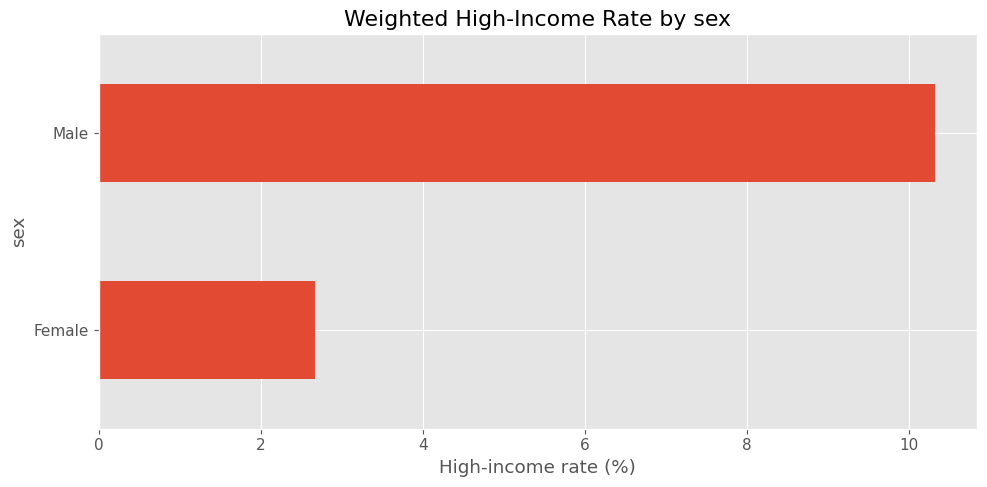

In [29]:
def plot_rates(df, col, top_n=None):
    """Plot horizontal bar chart of weighted high-income rates."""
    rates = get_weighted_rates(df, col)
    if top_n:
        rates = rates.head(top_n)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    rates.sort_values().plot(kind='barh', ax=ax)
    ax.set_xlabel('High-income rate (%)')
    ax.set_title(f'Weighted High-Income Rate by {col}')
    plt.tight_layout()
    plt.show()

plot_rates(df, 'sex')

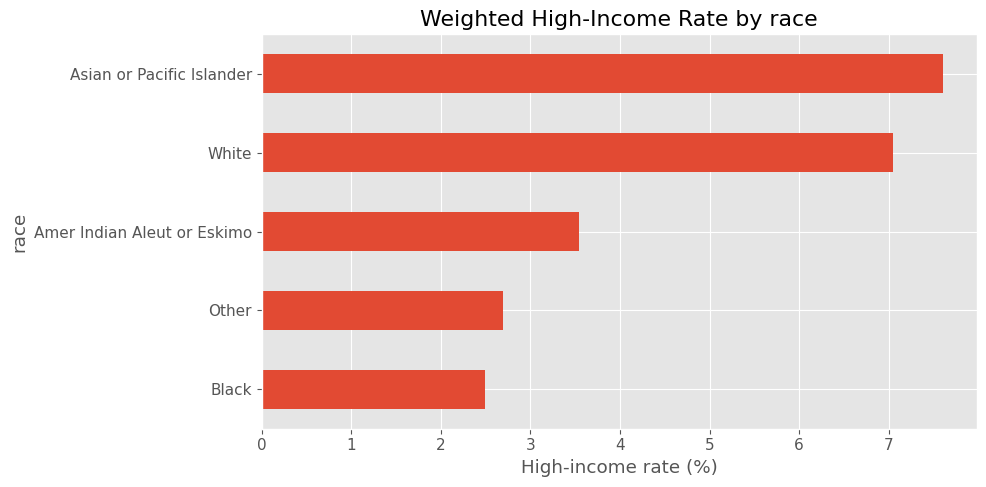

In [30]:
plot_rates(df, 'race')

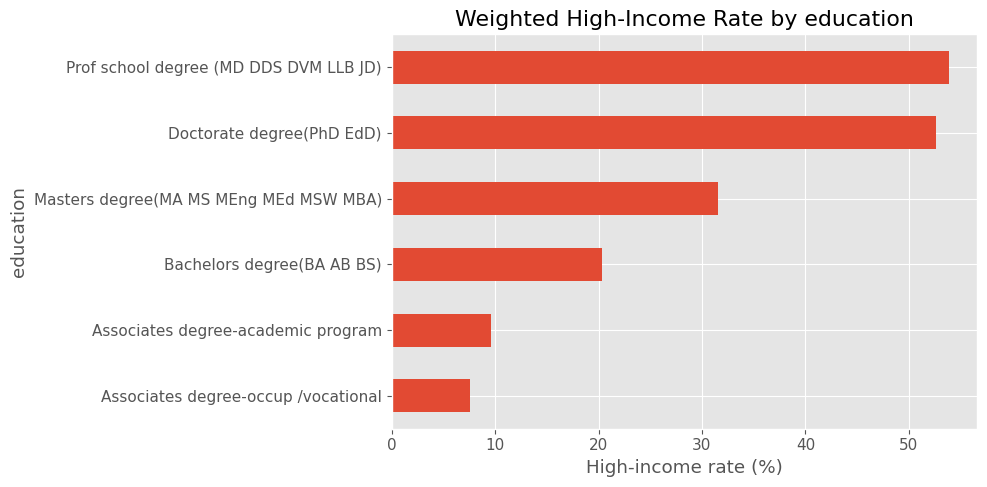

In [31]:
plot_rates(df, 'education', top_n=6)

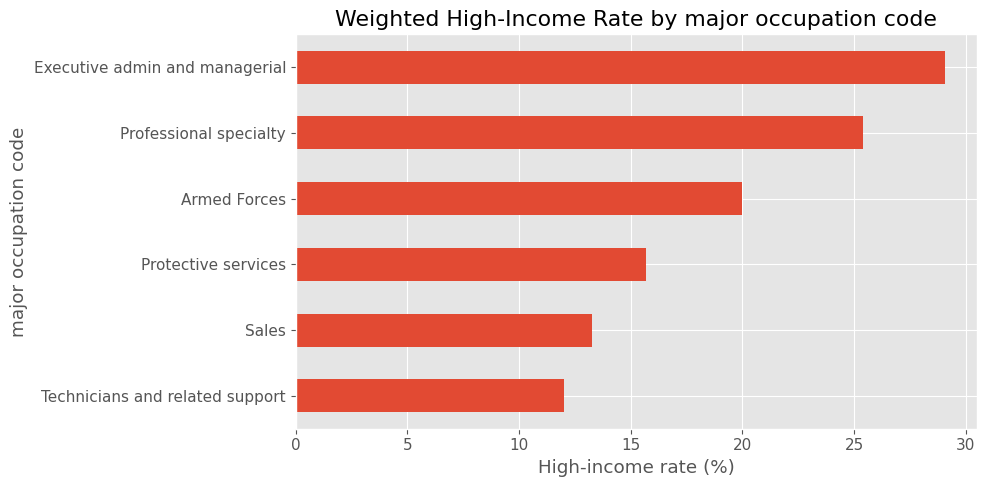

In [32]:
plot_rates(df, 'major occupation code', top_n=6)

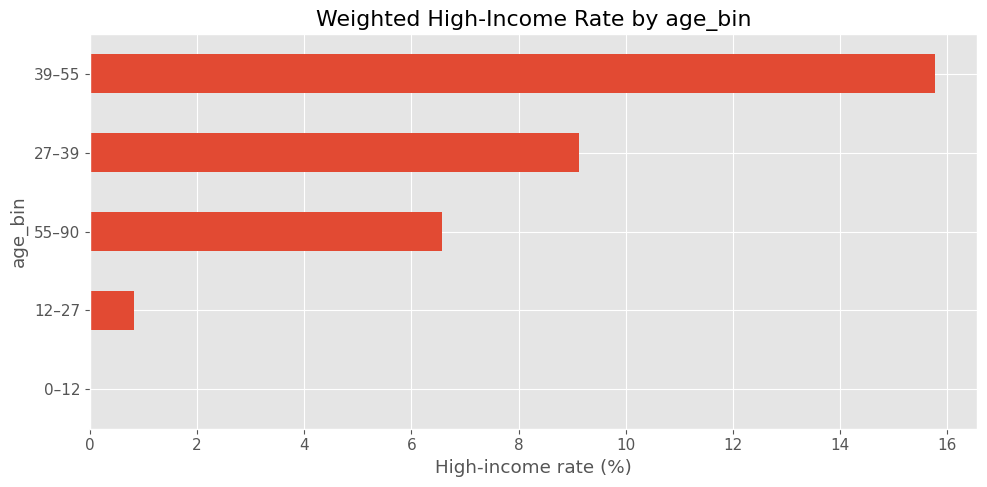

In [33]:
plot_rates(df, 'age_bin')

### Education and Income Breakdown

In [34]:
def weighted_rate_by_income(group, income_value):
    return np.average((group['outcome_bin'] == income_value).astype(int), weights=group['weight']) * 100

edu_summary = pd.DataFrame({
    'High Income (%)': df.groupby('education').apply(lambda x: weighted_rate_by_income(x, 1), include_groups=False),
    'Low Income (%)': df.groupby('education').apply(lambda x: weighted_rate_by_income(x, 0), include_groups=False)
}).round(2)

edu_summary.sort_values('High Income (%)', ascending=False)

,High Income (%),Low Income (%)
education,,
Prof school degree (MD DDS DVM LLB JD),53.89,46.11
Doctorate degree(PhD EdD),52.63,47.37
Masters degree(MA MS MEng MEd MSW MBA),31.59,68.41
Bachelors degree(BA AB BS),20.35,79.65
Associates degree-academic program,9.63,90.37
Associates degree-occup /vocational,7.59,92.41
Some college but no degree,6.50,93.50
High school graduate,3.76,96.24
12th grade no diploma,1.48,98.52


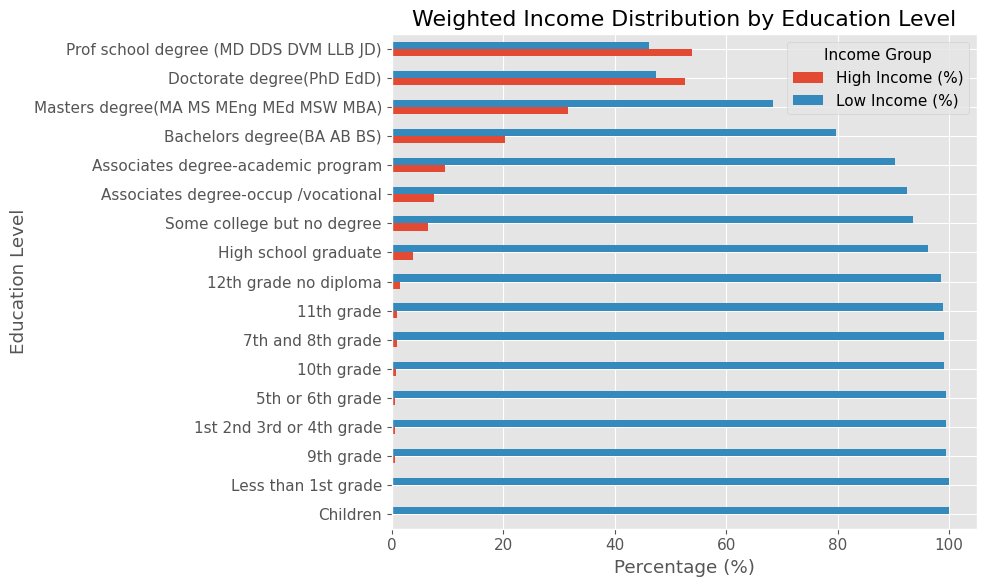

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
edu_summary.sort_values('High Income (%)').plot(kind='barh', ax=ax)
ax.set_title('Weighted Income Distribution by Education Level')
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Education Level')
ax.legend(title='Income Group')
plt.tight_layout()
plt.show()

## Feature Engineering

Creating simplified categorical features for modeling.

In [36]:
# education level grouping
def categorize_education(edu):
    edu = str(edu).strip()
    if edu == 'Children':
        return 'children'
    elif edu in ['Less than 1st grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade',
                 '7th and 8th grade', '9th grade', '10th grade', '11th grade', '12th grade no diploma']:
        return 'no_diploma'
    elif edu == 'High school graduate':
        return 'high_school'
    elif edu in ['Some college but no degree', 'Associates degree-occup /vocational',
                 'Associates degree-academic program']:
        return 'some_college'
    elif edu == 'Bachelors degree(BA AB BS)':
        return 'bachelors'
    elif edu in ['Masters degree(MA MS MEng MEd MSW MBA)', 'Prof school degree (MD DDS DVM LLB JD)',
                 'Doctorate degree(PhD EdD)']:
        return 'graduate'
    else:
        return 'unknown'

df['education_level'] = df['education'].apply(categorize_education)
df['education_level'].value_counts()

education_level
high_school     48407
children        47422
some_college    37541
no_diploma      36691
bachelors       19865
graduate         9597
Name: count, dtype: int64

This reduces 17 education categories to 6 meaningful levels. Graduate degree holders (9,597) represent 5% of the dataset but have 50%+ high income rates.

In [37]:
# worker type grouping
def categorize_worker(worker):
    worker = str(worker).strip()
    if 'Not_applicable' in worker:
        return 'not_in_labor_force'
    elif 'Self-employed' in worker:
        return 'self_employed'
    elif worker in ['Federal government', 'State government', 'Local government']:
        return 'government'
    elif worker == 'Private':
        return 'private'
    elif worker in ['Never worked', 'Without pay']:
        return 'not_working'
    else:
        return 'other'

df['worker_type'] = df['class of worker'].apply(categorize_worker)
df['worker_type'].value_counts()

worker_type
not_in_labor_force    100245
private                72028
government             14936
self_employed          11710
not_working              604
Name: count, dtype: int64

Half the dataset (100,245) is not in the labor force, including children, retirees, and students. Self-employed individuals showed the highest income rate (36%) among workers.

In [38]:
# investment income indicators
df['has_capital_gains'] = (df['capital gains'] > 0).astype(int)
df['has_capital_losses'] = (df['capital losses'] > 0).astype(int)
df['has_dividends'] = (df['dividends from stocks'] > 0).astype(int)
df['has_any_investment'] = ((df['capital gains'] > 0) | 
                            (df['capital losses'] > 0) | 
                            (df['dividends from stocks'] > 0)).astype(int)

print(f"Individuals with any investment income: {df['has_any_investment'].sum():,} ({df['has_any_investment'].mean()*100:.1f}%)")

Individuals with any investment income: 29,357 (14.7%)


About 15% of individuals have investment income. These binary indicators provide a cleaner signal than the heavily skewed dollar amounts.

In [39]:
# marital status grouping
def categorize_marital(status):
    status = str(status).strip()
    if 'Married' in status and 'spouse present' in status:
        return 'married_present'
    elif 'Married' in status:
        return 'married_absent'
    elif status == 'Never married':
        return 'never_married'
    elif status in ['Divorced', 'Separated']:
        return 'divorced_separated'
    elif status == 'Widowed':
        return 'widowed'
    else:
        return 'other'

df['marital_group'] = df['marital stat'].apply(categorize_marital)
df['marital_group'].value_counts()

marital_group
never_married         86485
married_present       84887
divorced_separated    16170
widowed               10463
married_absent         1518
Name: count, dtype: int64

Never married (86,485) includes children. Married with spouse present showed 11.9% high income rate compared to 1.4% for never married.

In [40]:
# citizenship grouping
def categorize_citizenship(cit):
    cit = str(cit).strip()
    if 'Native' in cit:
        return 'native'
    elif 'naturalization' in cit:
        return 'naturalized'
    else:
        return 'non_citizen'

df['citizenship_status'] = df['citizenship'].apply(categorize_citizenship)
df['citizenship_status'].value_counts()

citizenship_status
native         180267
non_citizen     13401
naturalized      5855
Name: count, dtype: int64

Native citizens make up 90%. Naturalized citizens showed 10.5% high income rate compared to 3.9% for non-citizens.

In [41]:
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label,outcome_cat,outcome_bin,age_bin,education_level,worker_type,has_capital_gains,has_capital_losses,has_dividends,has_any_investment,marital_group,citizenship_status
0,73,Not_applicable,0,0,High school graduate,0,Not_applicable,Widowed,Not_applicable,Not_applicable,White,All other,Female,Not_applicable,Not_applicable,Not in labor force,0,0,0,Nonfiler,Not_applicable,Not_applicable,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Not_applicable,Not_applicable,Not_applicable,Not_applicable,Not_applicable,0,Not_applicable,United-States,United-States,United-States,Native- Born in the United States,0,Not_applicable,2,0,95,- 50000.,low-income,0,55–90,high_school,not_in_labor_force,0,0,0,0,widowed,native
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not_applicable,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not_applicable,Not_applicable,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not_applicable,United-States,United-States,United-States,Native- Born in the United States,0,Not_applicable,2,52,94,- 50000.,low-income,0,55–90,some_college,self_employed,0,0,0,0,divorced_separated,native
2,18,Not_applicable,0,0,10th grade,0,High school,Never married,Not_applicable,Not_applicable,Asian or Pacific Islander,All other,Female,Not_applicable,Not_applicable,Not in labor force,0,0,0,Nonfiler,Not_applicable,Not_applicable,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Not_applicable,Not_applicable,Not_applicable,Not_applicable,Not_applicable,0,Not_applicable,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not_applicable,2,0,95,- 50000.,low-income,0,12–27,no_diploma,not_in_labor_force,0,0,0,0,never_married,non_citizen
3,9,Not_applicable,0,0,Children,0,Not_applicable,Never married,Not_applicable,Not_applicable,White,All other,Female,Not_applicable,Not_applicable,Children or Armed Forces,0,0,0,Nonfiler,Not_applicable,Not_applicable,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not_applicable,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not_applicable,0,0,94,- 50000.,low-income,0,0–12,children,not_in_labor_force,0,0,0,0,never_married,native
4,10,Not_applicable,0,0,Children,0,Not_applicable,Never married,Not_applicable,Not_applicable,White,All other,Female,Not_applicable,Not_applicable,Children or Armed Forces,0,0,0,Nonfiler,Not_applicable,Not_applicable,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not_applicable,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not_applicable,0,0,94,- 50000.,low-income,0,0–12,children,not_in_labor_force,0,0,0,0,never_married,native


## Information Value Analysis

Computing Weight of Evidence (WOE) and Information Value (IV) to assess predictive power of features for logistic regression.

In [42]:
def compute_woe_iv(df, feature, target='outcome_bin', weight='weight'):
    """Compute WOE and IV for a categorical feature."""
    grouped = df.groupby(feature).apply(
        lambda x: pd.Series({
            'good_w': np.sum((x[target] == 0) * x[weight]),
            'bad_w': np.sum((x[target] == 1) * x[weight])
        }), include_groups=False
    )
    
    grouped = grouped[(grouped['good_w'] > 0) | (grouped['bad_w'] > 0)]
    grouped['dist_good'] = grouped['good_w'] / grouped['good_w'].sum()
    grouped['dist_bad'] = grouped['bad_w'] / grouped['bad_w'].sum()
    
    eps = 1e-9
    grouped['woe'] = np.log((grouped['dist_bad'] + eps) / (grouped['dist_good'] + eps))
    grouped['iv'] = (grouped['dist_bad'] - grouped['dist_good']) * grouped['woe']
    
    return grouped, grouped['iv'].sum()

# features to evaluate
iv_features = ['education_level', 'worker_type', 'marital_group', 
               'citizenship_status', 'age_bin', 'has_any_investment', 'sex']

iv_results = {}
for col in iv_features:
    _, iv_val = compute_woe_iv(df, col)
    iv_results[col] = iv_val

iv_ranking = pd.Series(iv_results).sort_values(ascending=False)
print('Information Value (IV) by Feature:')
print('IV > 0.3 indicates strong predictive power')
print('-' * 40)
iv_ranking.round(4)

Information Value (IV) by Feature:
IV > 0.3 indicates strong predictive power
----------------------------------------


education_level       6.0038
age_bin               4.8292
worker_type           1.2512
has_any_investment    1.0769
marital_group         0.8677
sex                   0.4570
citizenship_status    0.0230
dtype: float64

All selected features have IV > 0.3 except citizenship, confirming they are strong predictors for logistic regression:

- **education_level** (6.00) - extremely strong
- **age_bin** (4.83) - very strong  
- **worker_type** (1.25) - strong
- **has_any_investment** (1.08) - strong
- **marital_group** (0.87) - strong
- **sex** (0.46) - medium

## Logistic Regression Model

Building a weighted logistic regression using the engineered features.

In [43]:
# selecting features for the model
model_features = ['sex', 'race', 'education_level', 'worker_type', 
                  'marital_group', 'citizenship_status', 'age_bin']

# preparing the data
df_model = df[model_features + ['outcome_bin', 'weight']].copy()
df_model = df_model.dropna(subset=['outcome_bin', 'weight'])

X = df_model[model_features]
y = df_model['outcome_bin'].astype(int)
w = df_model['weight']

# one-hot encoding
X = pd.get_dummies(X, columns=model_features, drop_first=True)
print(f'Feature matrix shape: {X.shape}')

Feature matrix shape: (199523, 24)


In [44]:
# train-test split with stratification
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w, test_size=0.3, random_state=42, stratify=y
)

print(f'Training set: {X_train.shape[0]:,} samples')
print(f'Test set: {X_test.shape[0]:,} samples')

Training set: 139,666 samples
Test set: 59,857 samples


In [45]:
# fitting weighted logistic regression
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train, sample_weight=w_train)

# predictions on test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# weighted AUC
auc_score = roc_auc_score(y_test, y_pred_prob, sample_weight=w_test)
print(f'Weighted AUC on test set: {auc_score:.4f}')

Weighted AUC on test set: 0.9129


The logistic regression achieves AUC of 0.91 using only demographic features, demonstrating strong discriminative power.

In [46]:
# coefficients and odds ratios
coef_table = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_.flatten(),
    'odds_ratio': np.exp(model.coef_.flatten())
}).sort_values('odds_ratio', ascending=False)

print('Logistic Regression Coefficients & Odds Ratios:')
coef_table.round(4)

Logistic Regression Coefficients & Odds Ratios:


,feature,coefficient,odds_ratio
0,sex_Male,1.4277,4.1689
22,age_bin_39–55,1.4159,4.1203
23,age_bin_55–90,1.3757,3.9577
21,age_bin_27–39,0.9102,2.4849
6,education_level_graduate,0.8076,2.2425
17,marital_group_widowed,0.4573,1.5798
13,worker_type_self_employed,0.4292,1.5360
12,worker_type_private,0.3817,1.4648
4,race_White,0.2876,1.3333
1,race_Asian or Pacific Islander,0.2461,1.2790


**Key insights from odds ratios:**

The highest odds of being in the high-income group belong to:
- Males (4.2x higher odds than females)
- Age 39-55 (4.1x higher odds than 0-12 baseline)
- Age 55-90 (3.9x higher)
- Graduate education (2.2x higher)
- Self-employed workers (1.5x higher)

Lowest odds:
- Children education level (0.0008x - essentially zero)
- No diploma (0.06x)
- Not working (0.20x)

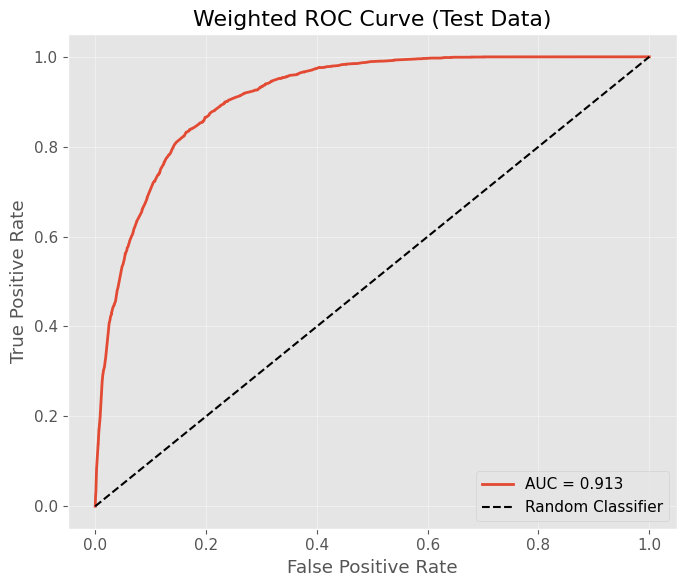

In [47]:
# ROC curve
def weighted_roc_curve(y_true, y_score, weights):
    """Compute weighted ROC curve."""
    thresholds = np.unique(np.sort(y_score))
    tpr_list, fpr_list = [], []
    
    pos_weight = np.sum(weights[y_true == 1])
    neg_weight = np.sum(weights[y_true == 0])
    
    for thresh in thresholds:
        preds = (y_score >= thresh).astype(int)
        tp = np.sum(weights[(preds == 1) & (y_true == 1)])
        fp = np.sum(weights[(preds == 1) & (y_true == 0)])
        tpr_list.append(tp / pos_weight)
        fpr_list.append(fp / neg_weight)
    
    return np.array(fpr_list), np.array(tpr_list)

fpr, tpr = weighted_roc_curve(np.array(y_test), np.array(y_pred_prob), np.array(w_test))

fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc_score:.3f}')
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Weighted ROC Curve (Test Data)')
ax.legend()
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## Summary of Findings from Regression Analysis and EDA

**Target Distribution:** Only 6.2% of individuals earn above $50,000, creating a highly imbalanced classification problem.

**Strongest Predictors (by Information Value):**
1. Education level - graduate degrees have 50%+ high income rate
2. Age - peak earnings at 39-55 years
3. Worker type - self-employed incorporated at 36%
4. Investment income - strong wealth indicator
5. Marital status - married with spouse present at 12%
6. Sex - males at 10.3% vs females at 2.7%

**Model Performance:** Logistic regression with demographic features achieves weighted AUC of 0.91, indicating strong predictive ability.

**Profile of High Earners:**
- Male
- Age 39-55
- Graduate education
- Self-employed or federal government
- Married with spouse present
- US citizen
- Full-year worker (48+ weeks)

## Population segmentation with PCA and KMeans

In this section we use unsupervised learning to segment the US census population.
We first compress the demographic feature space with PCA and then apply KMeans
to learn a small number of population segments.


###  Data preparation for segmentation

We reuse the engineered features from the previous analysis and build a
        feature matrix that combines key numeric variables with one hot encoded
        categorical fields.

In [48]:
# numeric features for segmentation
segmentation_features = [
    "age",
    "wage per hour",
    "capital gains",
    "capital losses",
    "dividends from stocks",
    "num persons worked for employer",
    "weeks worked in year"
]

# engineered categorical features from earlier steps
categorical_cols = [
    "sex",
    "race",
    "education_level",
    "worker_type",
    "marital_group",
    "citizenship_status"
]

# copy base frame for segmentation
df_segment = df.copy()

# one hot encode categorical features
df_encoded = pd.get_dummies(
    df_segment[categorical_cols],
    columns=categorical_cols,
    drop_first=True
)

# combine numeric and encoded categorical features
X_segment = pd.concat(
    [
        df_segment[segmentation_features].reset_index(drop=True),
        df_encoded.reset_index(drop=True)
    ],
    axis=1
)

print(f"Segmentation dataset shape: {X_segment.shape}")
print(f"Number of features: {X_segment.shape[1]}")
print(f"Number of samples: {X_segment.shape[0]:,}")

Segmentation dataset shape: (199523, 27)
Number of features: 27
Number of samples: 199,523


###  Feature scaling

PCA and KMeans are distance based methods, so we standardize each feature to
        zero mean and unit variance before fitting the models.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler_seg = StandardScaler()
X_scaled = scaler_seg.fit_transform(X_segment)
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X_segment.columns,
    index=df_segment.index
)

print("Scaled feature matrix shape:", X_scaled_df.shape)
print("Mean of scaled matrix (should be close to 0):", X_scaled.mean().round(4))
print("Std of scaled matrix (should be close to 1):", X_scaled.std().round(4))

Scaled feature matrix shape: (199523, 27)
Mean of scaled matrix (should be close to 0): 0.0
Std of scaled matrix (should be close to 1): 1.0


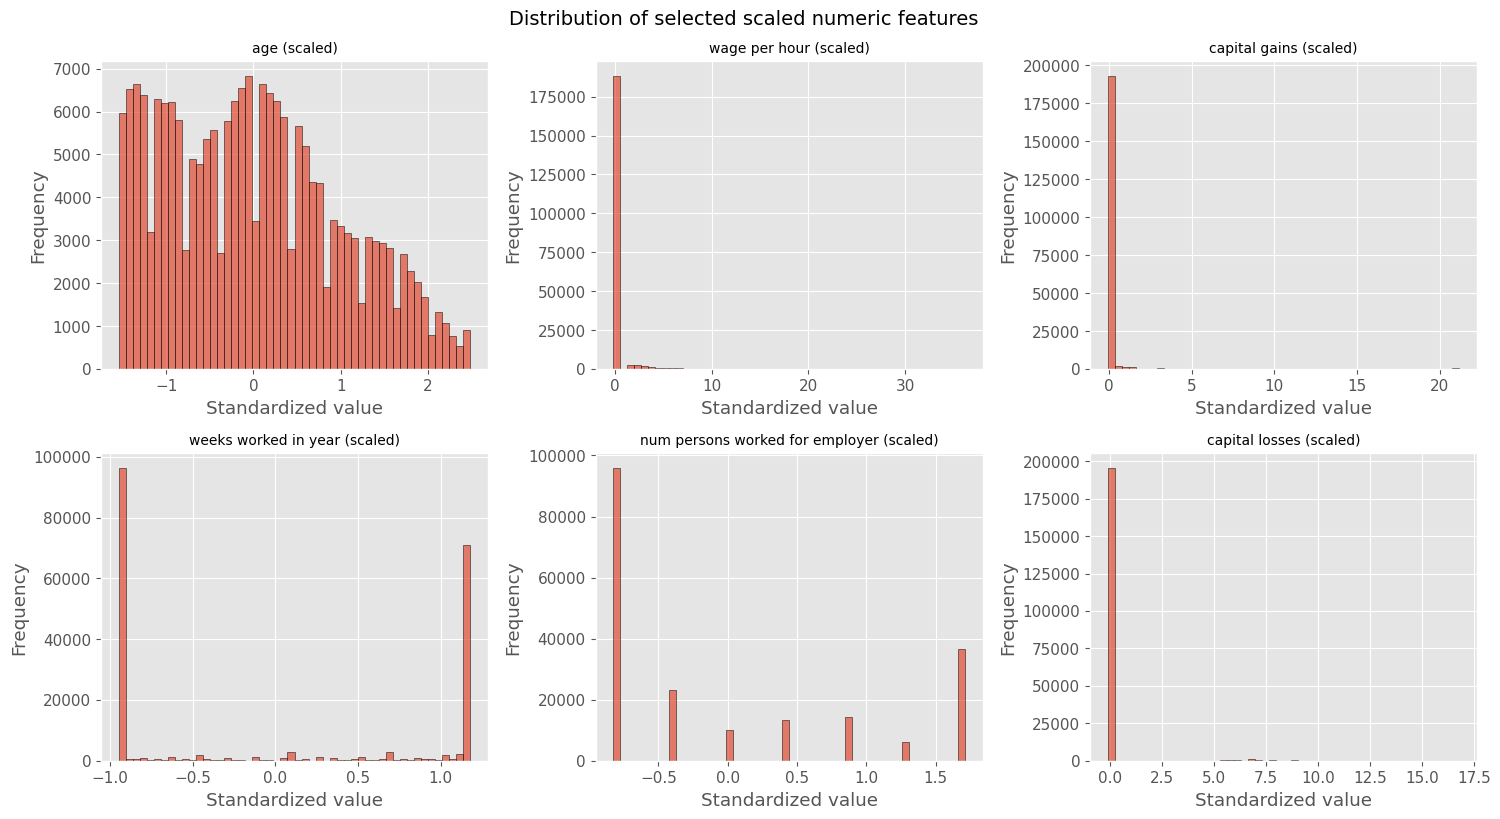

In [50]:
# quick look at distributions of a few scaled numeric features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

sample_features = [
    "age",
    "wage per hour",
    "capital gains",
    "weeks worked in year",
    "num persons worked for employer",
    "capital losses"
]

for idx, feature in enumerate(sample_features):
    if feature in X_scaled_df.columns:
        axes[idx].hist(X_scaled_df[feature], bins=50, edgecolor="black", alpha=0.7)
        axes[idx].set_title(f"{feature} (scaled)", fontsize=10)
        axes[idx].set_xlabel("Standardized value")
        axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Distribution of selected scaled numeric features", y=1.02, fontsize=14)
plt.show()

The cumulative variance plot shows that:

- Around 12 components are needed to reach 70 percent of explained variance.
- 15 components cover about 80 percent and 18 components cover about 90 percent.

For segmentation, I keep only the first 5 components. These 5 PCs still capture the main structure of the data while giving a compact representation that is easy to visualize and cluster.


### Principal Component Analysis

We first fit PCA with all components to inspect how many are needed to capture
        most of the variance. Then we fix the dimensionality to 5 components for
        clustering, following the idea in the AWS example.

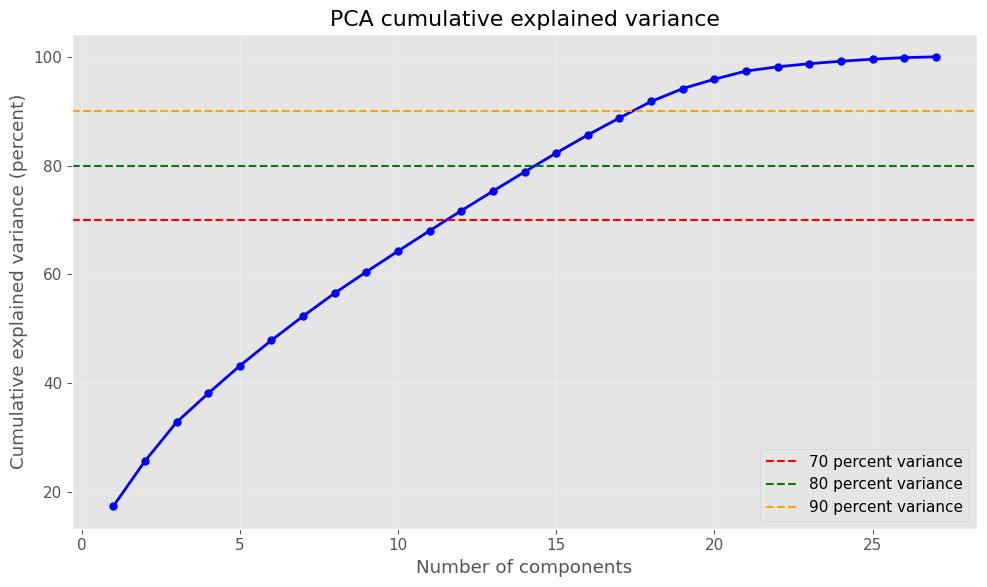

Components for 70 percent variance: 12
Components for 80 percent variance: 15
Components for 90 percent variance: 18


In [51]:
from sklearn.decomposition import PCA

# fit PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var_ratio = pca_full.explained_variance_ratio_
cum_explained = explained_var_ratio.cumsum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    range(1, len(cum_explained) + 1),
    cum_explained * 100,
    "bo-",
    linewidth=2,
    markersize=5
)
ax.axhline(70, color="r", linestyle="--", label="70 percent variance")
ax.axhline(80, color="g", linestyle="--", label="80 percent variance")
ax.axhline(90, color="orange", linestyle="--", label="90 percent variance")
ax.set_xlabel("Number of components")
ax.set_ylabel("Cumulative explained variance (percent)")
ax.set_title("PCA cumulative explained variance")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# components needed for different thresholds
n_comp_70 = np.argmax(cum_explained >= 0.70) + 1
n_comp_80 = np.argmax(cum_explained >= 0.80) + 1
n_comp_90 = np.argmax(cum_explained >= 0.90) + 1

print(f"Components for 70 percent variance: {n_comp_70}")
print(f"Components for 80 percent variance: {n_comp_80}")
print(f"Components for 90 percent variance: {n_comp_90}")

With 5 components the PCA model explains about 43 percent of the total variance. This is expected because the dataset has many categorical one hot features. Even though the variance share is below 50 percent, the first 5 PCs already capture broad patterns in age, weeks worked, worker type, race and education, which is enough for clustering.
 

In [52]:
# fix number of components for clustering
n_components = 5
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_cols = [f"PC{i}" for i in range(1, n_components + 1)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_cols, index=df_segment.index)

print("PCA transformed shape:", X_pca_df.shape)
print(
    f"Variance explained by {n_components} components: {pca.explained_variance_ratio_.sum() * 100:.2f} percent"
)

PCA transformed shape: (199523, 5)
Variance explained by 5 components: 43.13 percent


#### Main loadings for each component

To understand the axes in the reduced space, we inspect the features with the
        largest absolute loadings in each principal component.

In [53]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X_segment.columns,
    columns=pca_cols
)

def show_top_loadings(component_name, top_n=10):
    comp = loadings[component_name]
    tmp = pd.DataFrame({"feature": comp.index, "loading": comp.values})
    tmp["abs_loading"] = tmp["loading"].abs()
    return tmp.sort_values("abs_loading", ascending=False).head(top_n)

for pc in pca_cols:
    print("\n" + "=" * 60)
    print(f"Top loadings for {pc} (variance {pca.explained_variance_ratio_[pca_cols.index(pc)] * 100:.2f} percent)")
    print("=" * 60)
    display(show_top_loadings(pc, top_n=10))


Top loadings for PC1 (variance 17.34 percent)


,feature,loading,abs_loading
6,weeks worked in year,0.387267,0.387267
17,worker_type_not_in_labor_force,-0.385159,0.385159
12,education_level_children,-0.372889,0.372889
23,marital_group_never_married,-0.333028,0.333028
5,num persons worked for employer,0.332096,0.332096
19,worker_type_private,0.304053,0.304053
22,marital_group_married_present,0.296714,0.296714
0,age,0.261637,0.261637
14,education_level_high_school,0.153257,0.153257
16,education_level_some_college,0.140113,0.140113



Top loadings for PC2 (variance 8.30 percent)


,feature,loading,abs_loading
0,age,0.454742,0.454742
24,marital_group_widowed,0.360047,0.360047
23,marital_group_never_married,-0.341458,0.341458
19,worker_type_private,-0.300894,0.300894
5,num persons worked for employer,-0.273978,0.273978
17,worker_type_not_in_labor_force,0.261373,0.261373
6,weeks worked in year,-0.242647,0.242647
15,education_level_no_diploma,0.209000,0.209000
12,education_level_children,-0.193482,0.193482
22,marital_group_married_present,0.184857,0.184857



Top loadings for PC3 (variance 7.15 percent)


,feature,loading,abs_loading
11,race_White,-0.642786,0.642786
9,race_Black,0.490595,0.490595
8,race_Asian or Pacific Islander,0.314120,0.314120
26,citizenship_status_non_citizen,0.222819,0.222819
15,education_level_no_diploma,0.213075,0.213075
10,race_Other,0.210488,0.210488
12,education_level_children,-0.143360,0.143360
24,marital_group_widowed,0.136457,0.136457
25,citizenship_status_naturalized,0.134496,0.134496
0,age,0.131328,0.131328



Top loadings for PC4 (variance 5.25 percent)


,feature,loading,abs_loading
20,worker_type_self_employed,0.453091,0.453091
13,education_level_graduate,0.422703,0.422703
8,race_Asian or Pacific Islander,0.304994,0.304994
2,capital gains,0.302962,0.302962
19,worker_type_private,-0.257324,0.257324
7,sex_Male,0.244998,0.244998
14,education_level_high_school,-0.226162,0.226162
24,marital_group_widowed,-0.216445,0.216445
4,dividends from stocks,0.192177,0.192177
22,marital_group_married_present,0.190523,0.190523



Top loadings for PC5 (variance 5.08 percent)


,feature,loading,abs_loading
15,education_level_no_diploma,-0.491796,0.491796
26,citizenship_status_non_citizen,-0.467887,0.467887
14,education_level_high_school,0.438011,0.438011
9,race_Black,0.388404,0.388404
11,race_White,-0.196744,0.196744
8,race_Asian or Pacific Islander,-0.182665,0.182665
21,marital_group_married_absent,-0.174971,0.174971
10,race_Other,-0.131112,0.131112
19,worker_type_private,-0.119235,0.119235
20,worker_type_self_employed,0.109782,0.109782


From the top loadings we can interpret the components as:

- PC1: Work intensity and labor force status  
  High positive loading for weeks worked and private worker type, and strong negative loading for children and not in labor force. This axis separates active workers from children and non workers.

- PC2: Age and life stage  
  Positive for older ages and widowed, negative for never married and private workers. This axis moves from young never married individuals to older widowed adults.

- PC3: Race and basic demographics  
  Strong opposite loadings for White versus Black, plus contributions from Asian or Pacific Islander and citizenship. This component captures broad racial and citizenship differences.

- PC4: Education, self employment and investment  
  High positive loadings for graduate education, self employed workers, and capital gains or dividends, and negative for high school only. This axis reflects a "skilled and entrepreneurial" dimension.

- PC5: Education and citizenship contrast  
  Large negative loadings for no diploma and non citizen, positive for high school and Black race. This component separates very low education and non citizen groups from relatively more educated native groups.

These interpretations help later when we profile the clusters and give them human readable names.


### KMeans clustering on PCA representation

Next we cluster the five dimensional PCA representation. We first compare
        several values of k and then choose a small number of segments for
        detailed profiling.

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range = range(3, 8)
inertias = []
sil_scores = []

print("Evaluating candidate cluster counts...")
for k in cluster_range:
    km_tmp = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=20,
        max_iter=300
    )
    labels_tmp = km_tmp.fit_predict(X_pca)
    inertia = km_tmp.inertia_
    sil = silhouette_score(X_pca, labels_tmp)
    inertias.append(inertia)
    sil_scores.append(sil)
    print(f"k={k}: inertia={inertia:,.0f}, silhouette={sil:.4f}")

metrics_df = pd.DataFrame({
    "k": list(cluster_range),
    "inertia": inertias,
    "silhouette": sil_scores
})
metrics_df

Evaluating candidate cluster counts...
k=3: inertia=1,192,798, silhouette=0.3860
k=4: inertia=986,263, silhouette=0.4130
k=5: inertia=827,783, silhouette=0.4287
k=6: inertia=712,355, silhouette=0.4503
k=7: inertia=642,323, silhouette=0.4593


,k,inertia,silhouette
0,3,1.192798e+06,0.386041
1,4,9.862629e+05,0.412988
2,5,8.277827e+05,0.428668
3,6,7.123549e+05,0.450309
4,7,6.423226e+05,0.459342


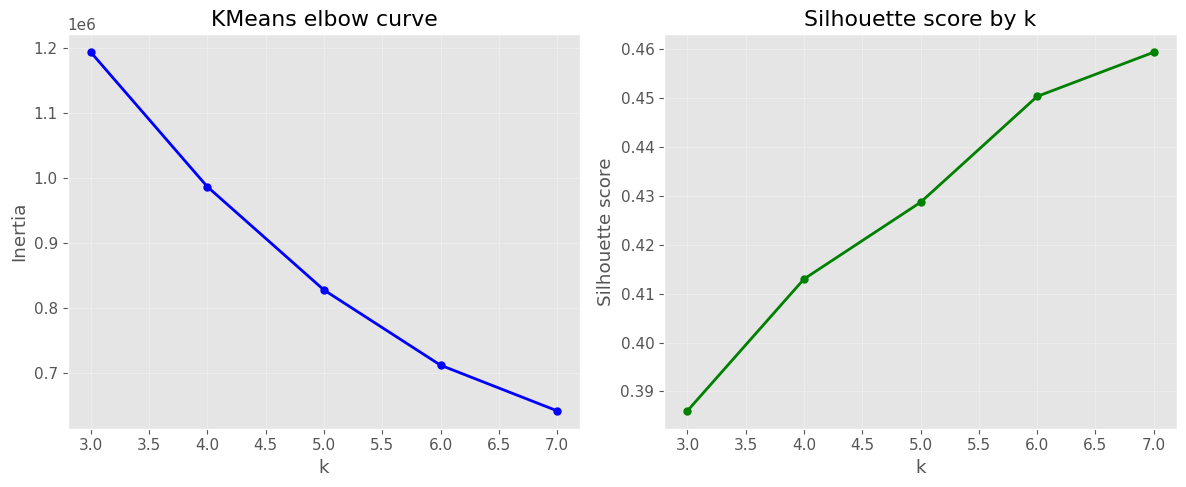

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# elbow curve
ax1.plot(metrics_df["k"], metrics_df["inertia"], "bo-", linewidth=2, markersize=5)
ax1.set_xlabel("k")
ax1.set_ylabel("Inertia")
ax1.set_title("KMeans elbow curve")
ax1.grid(alpha=0.3)

# silhouette
ax2.plot(metrics_df["k"], metrics_df["silhouette"], "go-", linewidth=2, markersize=5)
ax2.set_xlabel("k")
ax2.set_ylabel("Silhouette score")
ax2.set_title("Silhouette score by k")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [66]:

k_final = 7
print(f"Using k={k_final} clusters for final segmentation.")

kmeans = KMeans(
    n_clusters=k_final,
    random_state=42,
    n_init=50,
    max_iter=500
)
cluster_labels = kmeans.fit_predict(X_pca)

X_pca_df["cluster"] = cluster_labels
df_segment["cluster"] = cluster_labels

cluster_counts = df_segment["cluster"].value_counts().sort_index()
print("\nCluster sizes:")
for c, cnt in cluster_counts.items():
    pct = cnt / len(df_segment) * 100
    print(f"Cluster {c}: {cnt:6,} observations ({pct:5.2f} percent)")

Using k=7 clusters for final segmentation.

Cluster sizes:
Cluster 0: 46,614 observations (23.36 percent)
Cluster 1: 34,313 observations (17.20 percent)
Cluster 2: 66,496 observations (33.33 percent)
Cluster 3:  9,634 observations ( 4.83 percent)
Cluster 4: 12,106 observations ( 6.07 percent)
Cluster 5: 17,553 observations ( 8.80 percent)
Cluster 6: 12,807 observations ( 6.42 percent)


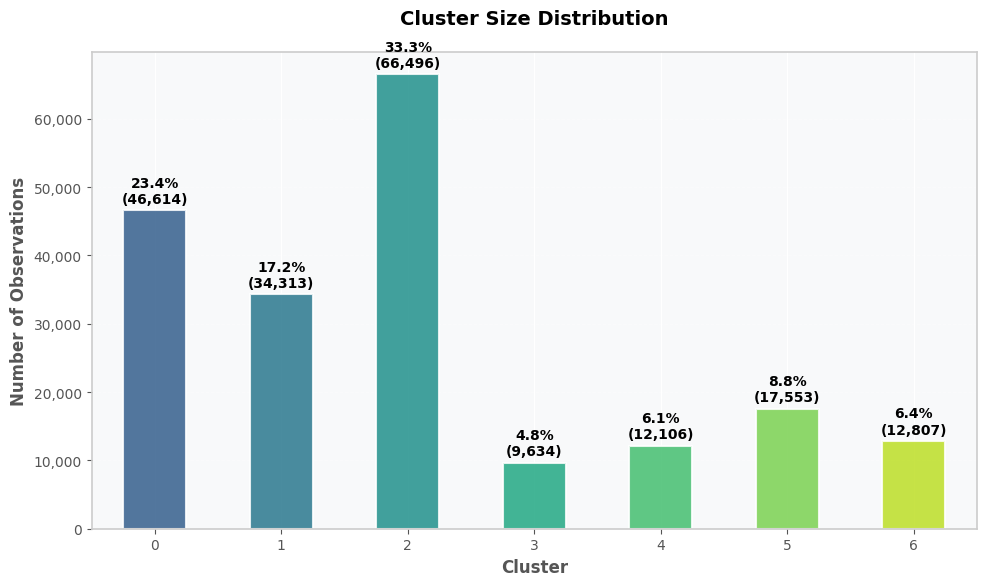

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars with gradient-like colors
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(cluster_counts)))
bars = cluster_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="white", 
                           alpha=0.85, linewidth=1.5)

# Styling
ax.set_xlabel("Cluster", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Observations", fontsize=12, fontweight='bold')
ax.set_title("Cluster Size Distribution", fontsize=14, fontweight='bold', pad=20)

# Add percentage labels on top of bars
for i, (c, cnt) in enumerate(cluster_counts.items()):
    pct = cnt / len(df_segment) * 100
    ax.text(i, cnt + max(cluster_counts) * 0.01, 
            f"{pct:.1f}%\n({cnt:,})", 
            ha="center", va="bottom", fontsize=10, fontweight='bold')

# Improve grid and background
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Format y-axis with thousand separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add a subtle border
for spine in ax.spines.values():
    spine.set_edgecolor('#cccccc')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()

The final segmentation splits the population into 7 clusters with the following sizes:

- Cluster 2 is the largest group with about one third of the population.
- Cluster 0 and Cluster 1 are medium sized groups.
- Cluster 3, 4, 5, and 6 are smaller segments that capture more specific profiles.

This mix of large and small clusters is expected in a real census dataset, where some groups are common and others are niche but still important.


### Cluster centroids and PCA space

We inspect the centroids in PCA space to see how each segment is positioned
        on the main components.

In [69]:
centroids_pca = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=pca_cols,
    index=[f"Cluster {i}" for i in range(k_final)]
)
centroids_pca.round(3)

,PC1,PC2,PC3,PC4,PC5
Cluster 0,-2.806,-0.440,-1.015,0.027,-0.147
Cluster 1,-0.211,2.530,0.165,-0.424,0.170
Cluster 2,1.914,-0.720,-0.507,-0.601,-0.103
Cluster 3,0.316,0.071,2.270,0.509,-2.835
Cluster 4,1.129,-1.251,2.910,-0.117,1.383
Cluster 5,1.875,0.616,-0.726,2.538,0.359
Cluster 6,-3.036,-1.153,2.424,0.407,0.947


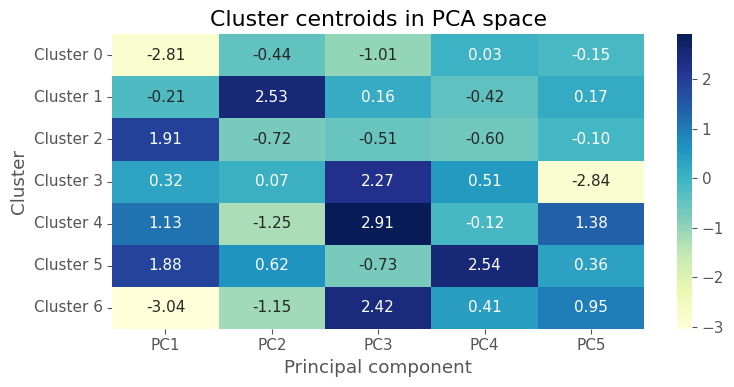

In [70]:
plt.figure(figsize=(8, 4))
ax = sns.heatmap(
    centroids_pca,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
ax.set_title("Cluster centroids in PCA space")
ax.set_xlabel("Principal component")
ax.set_ylabel("Cluster")
plt.tight_layout()
plt.show()

The centroid heatmap highlights how different clusters position themselves across the 5 PCA axes. For example:

- Clusters 0 and 6 are strongly negative on PC1 and have low weeks worked, which points to children or non workers.
- Cluster 5 is strongly positive on PC4, which is the education and self employment component, hinting at a higher skill and investment segment.
- Cluster 4 has high positive values on PC3 and PC5, linking it to racial and citizenship contrasts.

These patterns match the numeric profiles that we compute in the next steps.


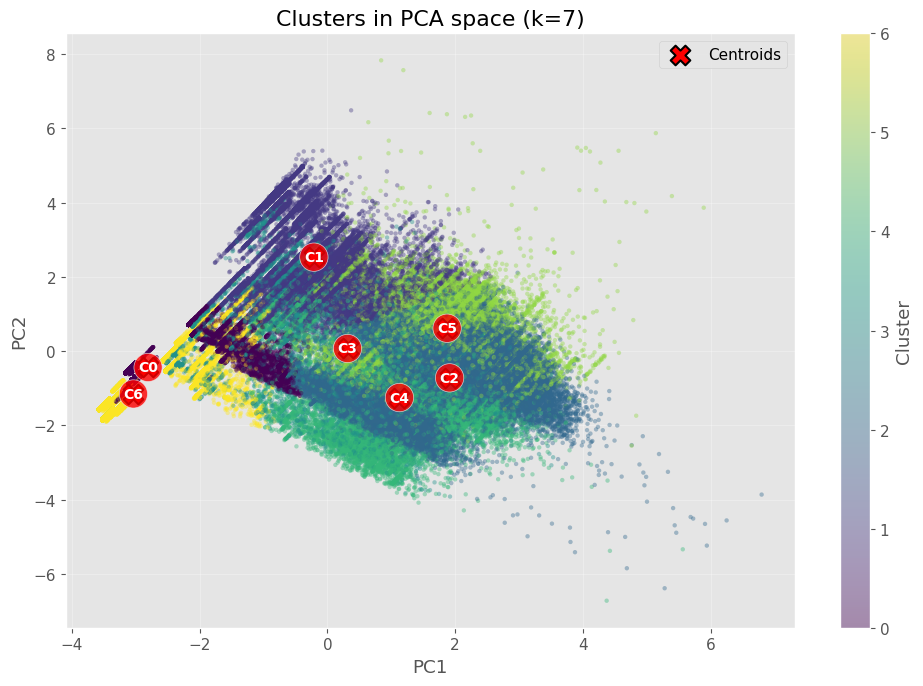

In [71]:
# 2D view on first two components
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(
    X_pca_df["PC1"],
    X_pca_df["PC2"],
    c=X_pca_df["cluster"],
    cmap="viridis",
    alpha=0.4,
    s=10,
    edgecolors="none"
)

centers_2d = kmeans.cluster_centers_[:, :2]
ax.scatter(
    centers_2d[:, 0],
    centers_2d[:, 1],
    c="red",
    marker="X",
    s=200,
    edgecolors="black",
    linewidths=1.5,
    label="Centroids"
)

for i, (x_c, y_c) in enumerate(centers_2d):
    ax.text(x_c, y_c, f"C{i}", color="white", ha="center", va="center", fontsize=10,
            fontweight="bold", bbox=dict(boxstyle="circle", facecolor="red", alpha=0.8))

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title(f"Clusters in PCA space (k={k_final})")
ax.legend()
ax.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.tight_layout()
plt.show()

### Cluster profiles in original feature space

Finally we summarize each cluster back in the original variables. These
        tables will be used in the report to describe the main segments
        qualitatively.

In [72]:
# numeric summaries by cluster
profile_numeric = df_segment.groupby("cluster")[[
    "age",
    "weeks worked in year",
    "wage per hour",
    "capital gains",
    "dividends from stocks",
    "has_any_investment",
    "outcome_bin"
]].mean().round(2)

profile_numeric.rename(columns={
    "weeks worked in year": "avg_weeks_worked",
    "wage per hour": "avg_wage_per_hour",
    "capital gains": "avg_capital_gains",
    "dividends from stocks": "avg_dividends",
    "has_any_investment": "share_with_any_investment",
    "outcome_bin": "high_income_rate"
}, inplace=True)

profile_numeric

,age,avg_weeks_worked,avg_wage_per_hour,avg_capital_gains,avg_dividends,share_with_any_investment,high_income_rate
cluster,,,,,,,
0,9.36,0.70,0.14,4.46,6.41,0.01,0.00
1,62.87,2.51,0.87,141.45,357.69,0.19,0.01
2,37.19,45.52,139.43,304.47,94.60,0.20,0.09
3,36.93,23.76,30.65,105.95,29.21,0.06,0.02
4,39.79,38.65,114.62,252.61,60.24,0.13,0.06
5,46.32,44.25,3.78,3264.42,1111.70,0.41,0.29
6,12.87,0.37,0.12,3.86,1.92,0.00,0.00


Based on the numeric profiles:

- Cluster 0 and Cluster 6 are very young groups with almost zero weeks worked and no investment income. These are mostly children and teenagers with almost no high income cases.

- Cluster 1 is an older group (average age around 63) with low work activity and almost no high income. This behaves like a retired or late career segment.

- Cluster 2 is a core working age group with high weeks worked and moderate income rate around 9 percent.

- Cluster 3 and Cluster 4 sit between the core workers and high income segments. They have mid level weeks worked and moderate investment activity.

- Cluster 5 stands out with the highest high income rate, the highest share of people with investment income, and strong work intensity. This is the main high earning segment in the population.


In [62]:
# education mix by cluster
edu_mix = (
    df_segment.groupby("cluster")["education_level"]
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      .round(2)
)
edu_mix

education_level,bachelors,children,graduate,high_school,no_diploma,some_college
cluster,,,,,,
0,0.01,0.78,0.00,0.03,0.15,0.04
1,0.16,0.00,0.08,0.33,0.13,0.29
2,0.08,0.00,0.03,0.36,0.37,0.16


In [74]:
# worker type mix by cluster
worker_mix = (
    df_segment.groupby("cluster")["worker_type"]
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      .round(2)
)
worker_mix

worker_type,government,not_in_labor_force,not_working,private,self_employed
cluster,,,,,
0,0.00,0.99,0.00,0.01,0.00
1,0.01,0.97,0.00,0.02,0.01
2,0.14,0.02,0.00,0.84,0.00
3,0.04,0.41,0.04,0.49,0.03
4,0.19,0.15,0.00,0.63,0.03
5,0.14,0.08,0.00,0.17,0.61
6,0.00,0.99,0.01,0.00,0.00


In [75]:
# marital status mix by cluster
marital_mix = (
    df_segment.groupby("cluster")["marital_group"]
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      .round(2)
)
marital_mix

marital_group,divorced_separated,married_absent,married_present,never_married,widowed
cluster,,,,,
0,0.00,0.00,0.00,1.00,0.00
1,0.09,0.00,0.61,0.03,0.27
2,0.13,0.00,0.59,0.27,0.01
3,0.07,0.09,0.48,0.33,0.03
4,0.17,0.01,0.48,0.31,0.03
5,0.08,0.00,0.81,0.09,0.01
6,0.03,0.00,0.00,0.96,0.00


In [76]:
# income distribution by cluster
income_by_cluster = pd.crosstab(
    df_segment["cluster"],
    df_segment["outcome_cat"],
    normalize="index"
) * 100
income_by_cluster.round(2)

outcome_cat,high-income,low-income
cluster,,
0,0.03,99.97
1,1.49,98.51
2,8.87,91.13
3,2.48,97.52
4,5.70,94.30
5,28.63,71.37
6,0.02,99.98


Education, worker type and marital status distributions give more detail about each cluster:

- Cluster 0 and Cluster 6  
  Dominated by the "children" education level and "not in labor force" worker type. Almost all members are never married and high income rates are essentially zero.

- Cluster 1  
  Very old on average, high share of widowed and married present, and almost all in "not_in_labor_force". This is a senior or retired population with very low high income rate.

- Cluster 2  
  Mostly private workers with a mix of high school, no diploma and some college. Many are married with spouse present. This looks like the broad working class and lower middle income group.

- Cluster 3 and Cluster 4  
  Mixed patterns in education and work. They include both private workers and people out of the labor force, with moderate income rates. These clusters capture transitional or mixed socio economic states.

- Cluster 5  
  High share of self employed and government workers, strong presence of graduate and bachelors education, and many married with spouse present. Income_by_cluster confirms that nearly 29 percent of this cluster is high income, which is the highest among all segments.

Overall, the segmentation recovers intuitive groups such as children, seniors, core workers and a high earning professional or entrepreneurial group.


# Conclusion

We explored the dataset with focused EDA to understand how the main demographic and employment variables behave. After cleaning and organizing the features, the patterns in age, education, work intensity, and marital groups became clear, and these variables consistently aligned with the differences between the two income categories. The logistic regression model captured these relationships well and showed which factors contribute most to higher or lower income. The results stay consistent with the trends seen during EDA, so the final classifier and insights follow naturally from the data.
